In [1]:
# enable seamless adoption of changes to external python scripts
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm

from feedback_opt.optimizers import OptimizerDualHProximal, OptimizerPrimal
from feedback_opt.simulation import Simulation
from feedback_opt.systems import SystemNonLinear
from feedback_opt.utils import plot_carthesian, plot_cost_and_violation

In [3]:
from scenarios.scenario_1d import Toy1D

# fetch parameters for scenario
params = Toy1D()

# instatiate objects
system = SystemNonLinear(params.sys)
optimizer = [
    OptimizerPrimal(params.opt_prim, system),
    OptimizerDualHProximal(params.opt_dualhprox_cent, system),
]
simulation = [Simulation(params.sim, system, opt) for opt in optimizer]

In [4]:
results = [(sim.optimizer.name, sim.run()) for sim in tqdm(simulation)]

100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


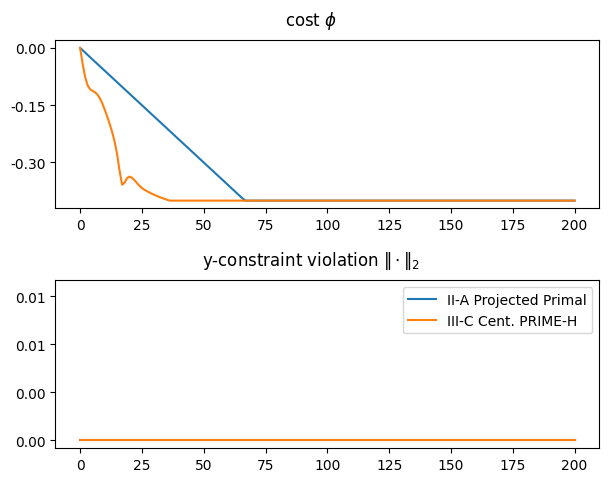

In [5]:
plot_cost_and_violation(results, x_tick_spacing=25, max_violation=0.01)

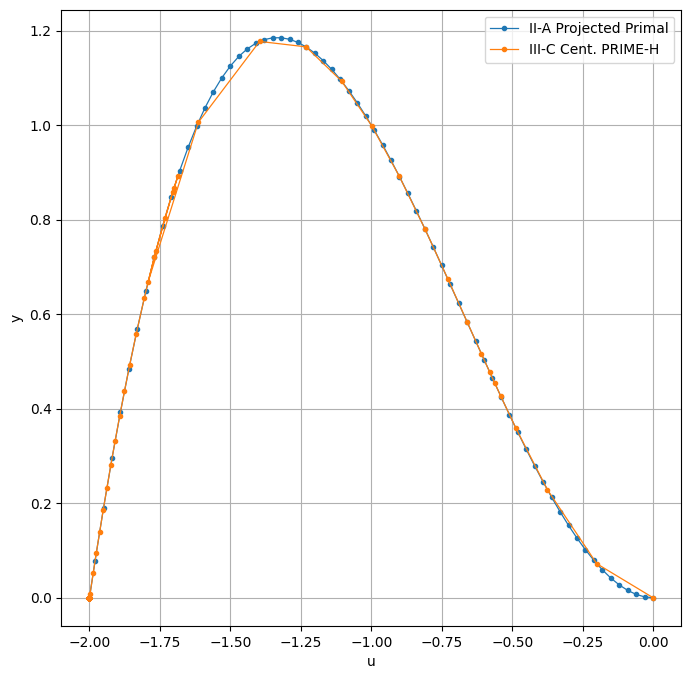

In [6]:
plot_carthesian(results, "u", "y")

In [7]:
from scenarios.scenario_1d import Toy1D

# fetch parameters for scenario
params = Toy1D()

# add measurement noise
params.sim.noise_seed = 0
params.sim.noise_y_std = 0.2

# instatiate objects
system = SystemNonLinear(params.sys)
optimizer = [
    OptimizerPrimal(params.opt_prim, system),
    OptimizerDualHProximal(params.opt_dualhprox_cent, system),
]
simulation = [Simulation(params.sim, system, opt) for opt in optimizer]

In [8]:
results = [(sim.optimizer.name, sim.run()) for sim in tqdm(simulation)]

100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


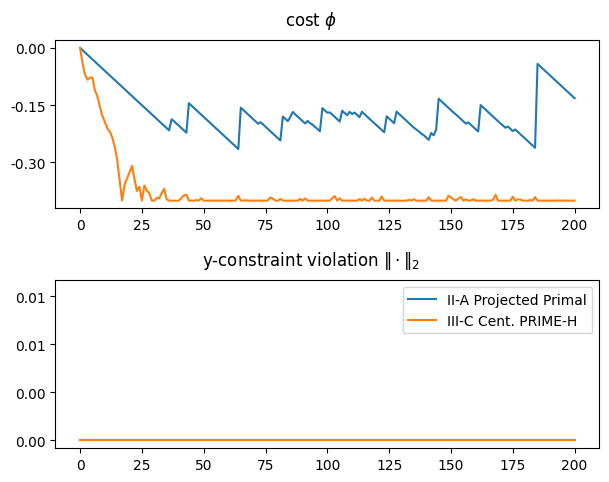

In [9]:
plot_cost_and_violation(results, x_tick_spacing=25, max_violation=0.01)

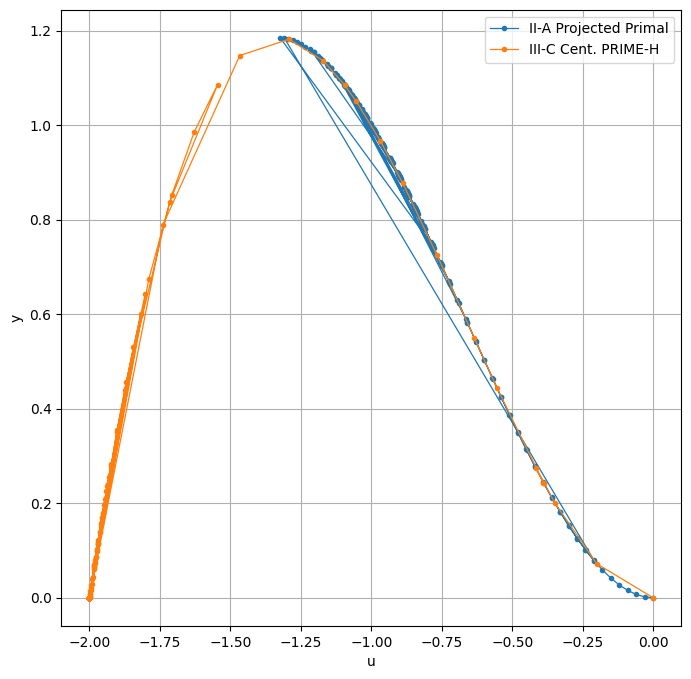

In [10]:
plot_carthesian(results, "u", "y")